# What are you listening to?
<img src="Data/Spotify_logo.png" width=700, height=50/>

## Section 1 - Overview
People in different parts of the world prefer to hear songs of different kinds, genres and duration. Spotify is one place where most of them fulfil their music cravings. In this notebook, we will to answer some of the questions of music trends around the globe. Here, we will be using <b>Spotify's Top Songs by Country Charts</b> dataset which was extracted by using Selenium and BeautifulSoup and is available on Kaggle <a href="https://www.kaggle.com/hkapoor/spotify-top-songs-by-country-may-2020">here</a>.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import matplotlib
sns.__version__

'0.11.2'

## Section 2 - Business Understaning
Through this notebook, we will try to dive deeper into the Spotify trends dataset and answer some of the questions around music trends and preferences.
### Question 1 - Spotify is available in which countires and continents?
### Question 2 - What are the top 10 tracks, artists and albums by number of occurences in charts?
### Question 3 - What is the distirbution of song durations?
### Question 4 - What is the distribution of explicit/non-explicit tracks on Spotify?

## Section 3 - Data Understaning
### Access
Data is available for free use on Kaggle - <a href="https://www.kaggle.com/datasets/hkapoor/spotify-top-songs-by-country-may-2020">Link</a>
<br>
The dataset contains "Top 50 songs" of 62 countries and one "Top 50 Global" chart.

In [2]:
data_df = pd.read_csv("Data/SpotifyTopSongsByCountry - May 2020.csv")

### Explore

In [3]:
data_df.shape

(3150, 8)

### Features
- <b>Country</b> : Country name or "Global" 
- <b>Continent</b> : Continent name
- <b>Rank</b> : Song rank specific to country
- <b>Title</b> : Title of the song
- <b>Artists</b> : Artist(s) of the song
- <b>Album</b> : Album name
- <b>Explicit</b> : If the track is explicit?
- <b>Duration</b> : Duration of the track

In [4]:
data_df.head(5)

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20
2,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01
3,Global,Global,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56
4,Global,Global,5,Toosie Slide,Drake,Dark Lane Demo Tapes,1,4:07


## Section 3 - Data Preparation

#### Clean
##### Converting duration from string of mm:ss format to int of seconds

In [38]:
seconds = []
for i in data_df["Duration"]:
    val = i.split(":")
    secs = int(val[0])*60 + int(val[1])
    seconds.append(secs)
data_df["Duration_in_secs"] = seconds

In [39]:
data_df.head(2)

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration,duration_in_s,Seconds,Duration_in_s
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02,182,182,182
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20,200,200,200


Besides "Duration" column, redt of the columns are already cleaned

## Section 4 - Evaluation

### Question 1 - Spotify is available in which countires and continents?
#### Analyze

In [5]:
unique_countries = data_df["Country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam'], dtype=object)

We have 62 unique countries in our dataset.

In [6]:
data_df["Continent"].unique()

array(['Global', 'South America', 'Australia', 'Europe', 'North America',
       'Asia', 'Africa'], dtype=object)

Number of countries in each continent

In [7]:
continent_value_counts = (data_df["Continent"].value_counts()/50).astype("int32")
continent_value_counts = continent_value_counts.drop("Global")

In [8]:
continent_value_counts

Europe           29
Asia             11
North America    10
South America     9
Australia         2
Africa            1
Name: Continent, dtype: int32

#### Visualize

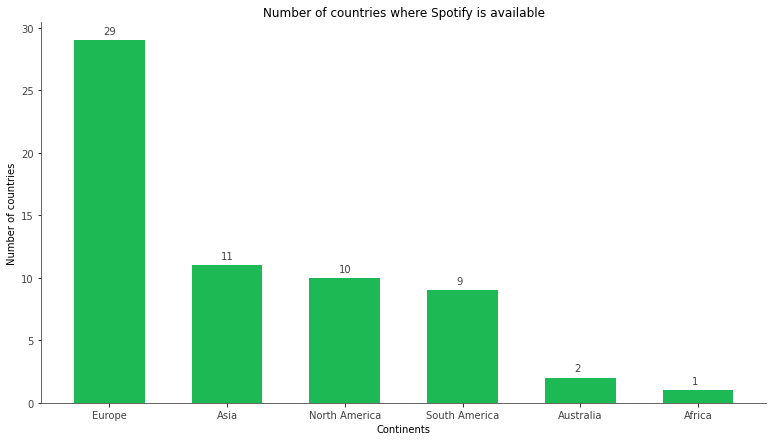

In [9]:
height = continent_value_counts.values
bars = continent_value_counts.index
y_pos = range(0,12,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=1.2)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+0.5, str(v), color='#424242')
plt.title("Number of countries in each continent", y=-0.15)

plt.title("Number of countries where Spotify is available")
plt.xlabel("Continents")
plt.ylabel("Number of countries")
plt.show()

We have majourity of our data from Europian countries.

### Question 2 - What are the top 10 tracks, artists and albums by number of occurences in charts?

#### Analyze

In [10]:
top10_tracks = data_df["Title"].value_counts()[:10].sort_values(ascending=True)

#### Visualize

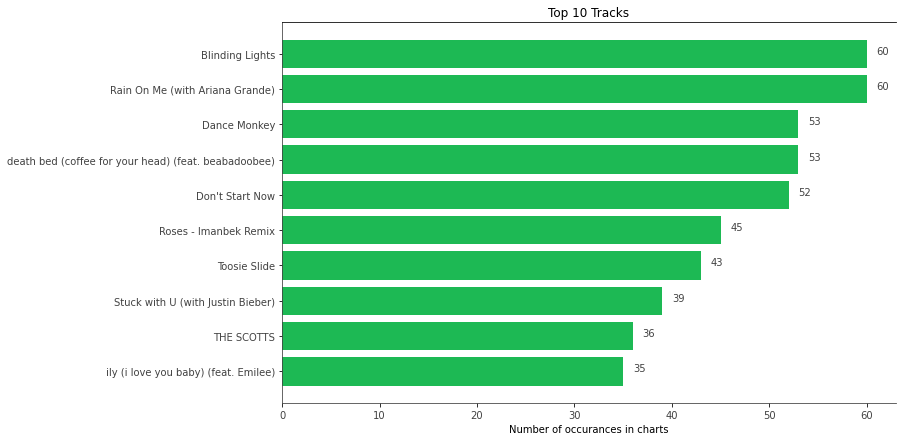

In [11]:
height = top10_tracks.values
bars = top10_tracks.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Tracks")


plt.show()

2 songs made it to 60 charts out of 63, that's something!

#### Analyze

Preprocessing the Artists columns because some tracks have multiple artists.

In [32]:
def extract_artist_names(df_col):
    '''
    returns all artist names into a list
    
    Input:
        Original column with artist names as string separated with a comma
    Output:
        List of all artist names
    '''
    artists_list = []
    for artist_str in df_col:
        artists = artist_str.split(", ")
        artists_list = artists_list + artists
    return artists_list

In [33]:
Artists = extract_artist_names(data_df["Artists"])

Number of total individual artist occurances in all songs.

In [34]:
len(Artists)

5056

In [14]:
top10_artists = pd.Series(Artists).value_counts()[:10].sort_values(ascending=True)

#### Visualize

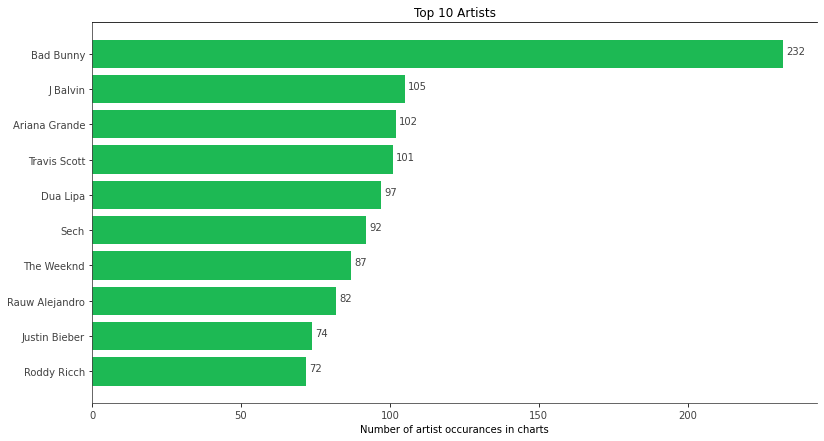

In [15]:
height = top10_artists.values
bars = top10_artists.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of artist occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Artists")


plt.show()

"Bad Bunny" outweighs all other artists by a huge margin! Ironically, none of his track made it to Top 10 most occuring tracks.

#### Analyze

In [16]:
top10_albums = data_df["Album"].value_counts()[:10].sort_values(ascending=True)

#### Visualize

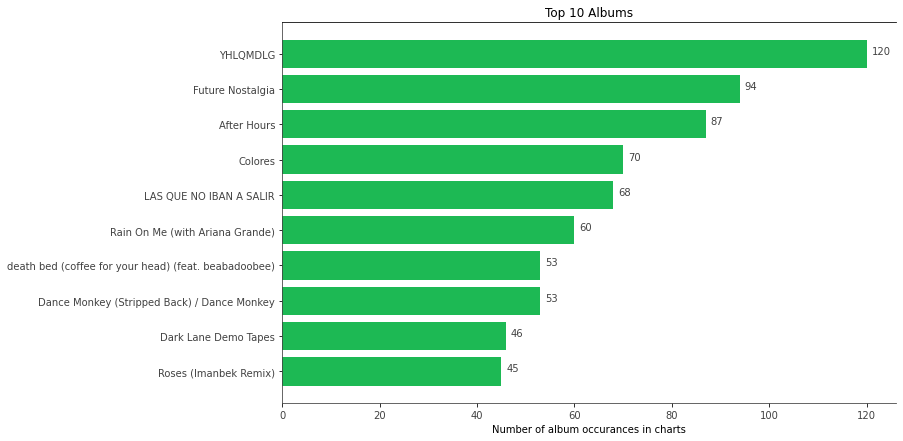

In [17]:
height = top10_albums.values
bars = top10_albums.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of album occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Albums")

plt.show()

Again, "Bad Bunny" wins this one.

### Question 3 - What is the distirbution of song durations?
#### Analyze

In [ ]:
data_df["Duration_in_secs"].value_counts().sort_index()

#### Visualize

C:\Users\hk25439\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


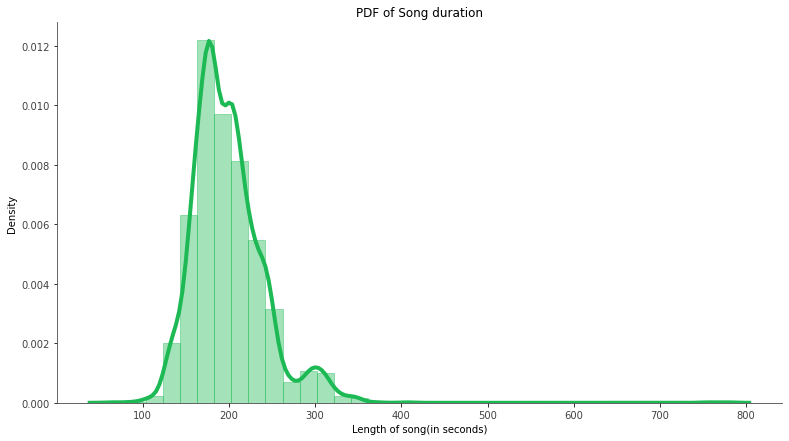

In [19]:
fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.distplot(data_df["Duration_in_secs"].tolist(), hist=True, kde=True, bins=int(180/5), color = '#1db954',  hist_kws={'edgecolor':'#1db954'},
             kde_kws={'linewidth': 4})
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("PDF of Song duration")

plt.show()

Most songs lies in the 3min to 3min 20 seconds range. Interestingly, there is another small spike close to 5 min mark. Let's explore!

#### Analyze

In [20]:
duration_by_c = data_df.groupby("Country").mean()["Duration_in_secs"]

Here, we will examine countries with lowest song duration averages

In [21]:
bottom5_duration = duration_by_c.sort_values()[:5]
bottom5_duration

Country
Germany    176.56
Sweden     179.50
Brazil     181.80
Austria    182.10
Denmark    184.22
Name: duration_in_s, dtype: float64

3 of them are from Europe, 1 from South America and 1 from Australia. Needless to stay it is pretty scattered to make a conclusion. Let's look at countries with highest song duration averages.

In [22]:
top5_duration = duration_by_c.sort_values(ascending=False)[:5]
top5_duration

Country
Japan        264.10
Indonesia    236.54
Thailand     223.00
Taiwan       220.66
India        217.16
Name: duration_in_s, dtype: float64

Wow! All 5 countries are Asian. Remember, we only had 11 Asian countries in our database. Let's create BoxPlots of are selected top and bottom 5 countries.

In [23]:
filtered_data1 = data_df[(data_df["Country"].isin(list(top5_duration.index))) + (data_df["Country"].isin(list(bottom5_duration.index)))]

#### Visualize

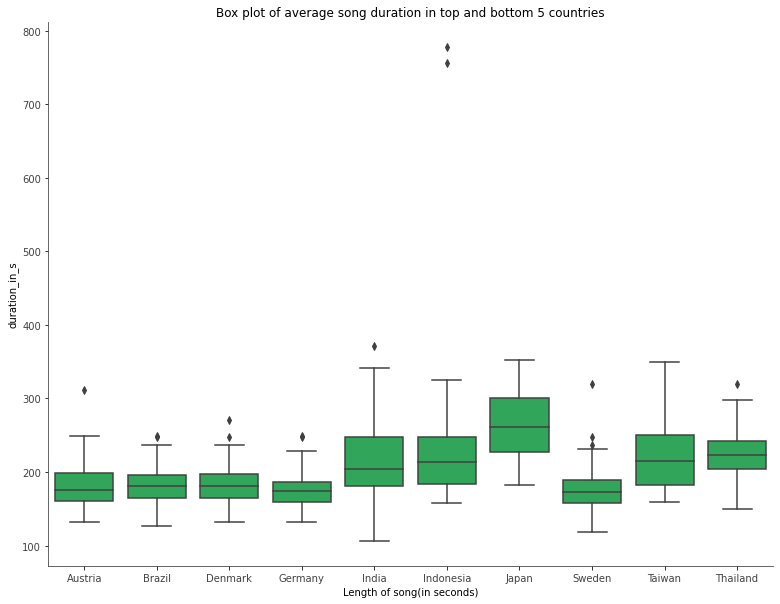

In [24]:
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data1["Country"], y = filtered_data1["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

Well, one reason Indonesia is 2nd on the list might be because of 2 extremely long songs. But, overall songs liked by Asians are longer in duration. Let's check this on the whole dataset.

#### Analyze

In [25]:
filtered_data2 = data_df[data_df["Continent"] != "Global"]

#### Visualize

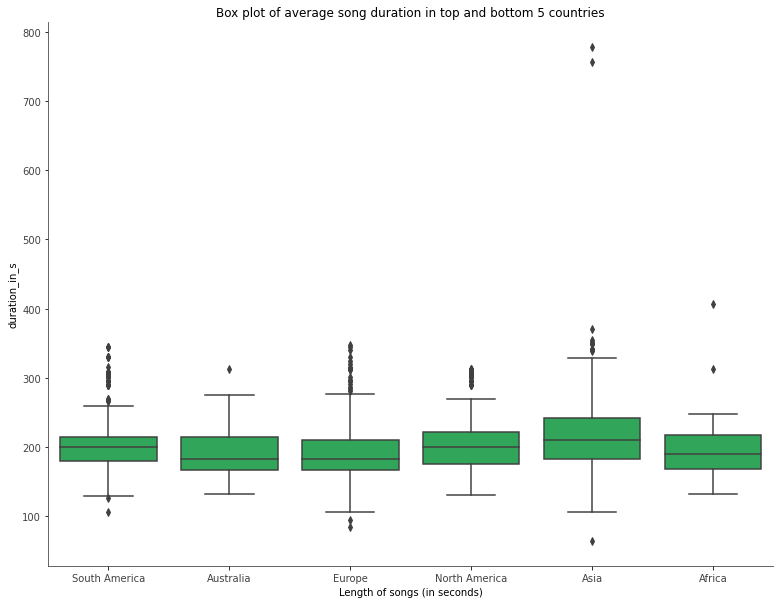

In [26]:
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data2["Continent"], y = filtered_data2["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of songs (in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

As we can see, songs preferred by Asians are of longer durations while songs liked in Europian countries are mostly around the 3minute mark.

### Question 4 - What is the distribution of explicit/non-explicit tracks on Spotify?
#### Analyze

In [27]:
exp_data = data_df["Explicit"].value_counts().sort_values()
exp_data

1    1099
0    2051
Name: Explicit, dtype: int64

#### Visualize

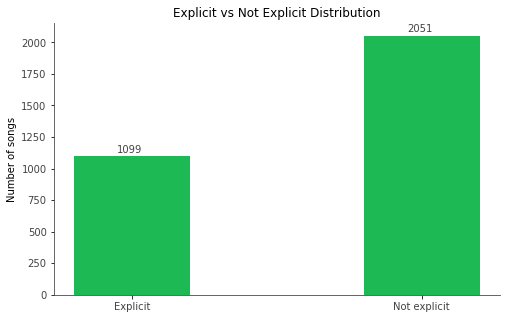

In [28]:
height = exp_data.values
bars = ["Explicit", "Not explicit"]
y_pos = range(0,4,2)

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+30, str(v), color='#424242')
plt.title("Explicit songs", y=-0.15)

plt.ylabel("Number of songs")
plt.title("Explicit vs Not Explicit Distribution")
plt.show()

Around 35% of the songs liked by people are Explicit. Let's see how it varies by location.

In [29]:
exp_data_cont = data_df.groupby("Continent").mean()["Explicit"]
exp_data_cont

Continent
Africa           0.460000
Asia             0.185455
Australia        0.440000
Europe           0.404138
Global           0.460000
North America    0.394000
South America    0.275556
Name: Explicit, dtype: float64

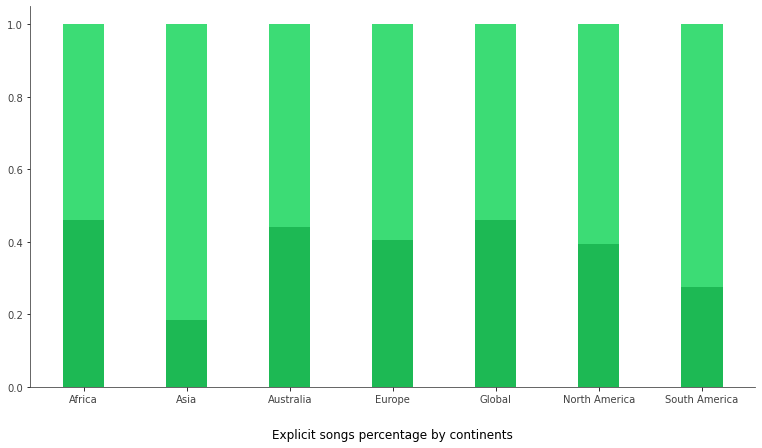

In [30]:
height = exp_data_cont.values
bars = exp_data_cont.index
y_pos = range(0,14,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
plt.bar(y_pos, 1 - height, bottom = height,color="#3CDC75", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
'''
for i, v in enumerate(height):
    ax.text((i)*2 - 0.2, v+0.01, str(np.round(v,2)), color='#424242')
'''
plt.title("Explicit songs percentage by continents", y=-0.15)

plt.show()

Turns out Asian countries don't prefer Explicit songs (18% approx.) as compared to other countries. Also, "Global Top 50 Chart" has 23 explicit songs. 

## Conclusions

1. Dataset is imbalanced with more Europian countries.
2. Some songs have managed to make in 96% of Top Charts.
3. Even though some artists have occurances in the Top charts, they don't have any song in Top 10 tracks occurances.
4. Average song duration preferred by most is around 3:00 minutes to 3:20 minutes.
5. People in Asian countries prefer longer song duration. Europian countries mostly listen to songs close to or less than 3 minutes.
6. Asian countries prefer less of explicit songs, only 18%, compared to world average of 35%. 
7. "Global Top 50 Chart" has 23 explicit songs.